In [16]:
import os
from dotenv import load_dotenv
import openai
import csv
import pandas as pd
from openai import OpenAI
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("IMDB Dataset.csv")

In [3]:
load_dotenv()
openai_api_key = os.getenv("OPENAI_API_KEY")
if not openai_api_key:
    raise ValueError("No OpenAI API key found. Check your .env file.")
openai.api_key = openai_api_key

In [4]:
df_small = df.iloc[99:120]

In [13]:
prompts = [
    """You are trained to analyze and detect the sentiment of given text. 
    If you're unsure of an answer, you can say "not sure" and recommend users to review manually.""",
    """Your task is to evaluate text for sentiment. Please classify the sentiment as either positive or negative accurately. 
    If a clear determination cannot be made, indicate uncertainty.""",
    """As a sentiment analysis expert, your role is to determine the emotional tone of a text snippet. 
    Label the text as 'positive' or 'negative'. If the sentiment is ambiguous, suggest a manual review.""",
    """You have the ability to understand and interpret the sentiment of written reviews. 
    Please categorize each review as positive or negative. If the sentiment is not clear, state that you are unsure.""",
    """Imagine you're a detective deciphering the mood of a piece of text. Your job is to classify it as positive or negative. 
    If the evidence is inconclusive, admit uncertainty.""",
    """You are an AI trained to recognize emotional undertones in text. Assign a 'positive' or 'negative' label to each review. 
    In cases of doubt, opt for 'not sure'.""",
    """Your objective is to analyze text and identify its sentiment. Please determine whether each text is positive or negative. 
    If the sentiment is not evident, indicate so.""",
    """As a connoisseur of language and emotion, you are tasked with classifying reviews based on sentiment. 
    Should you find a review's sentiment unclear, please flag it for manual inspection.""",
    """You possess the skill to analyze textual sentiment. Your goal is to label the sentiment as either positive or negative. 
    Should you encounter ambiguity, please note 'not sure'.""",
    """Act as a sentiment analyst, deciphering the emotional content of texts. Classify them as positively or negatively charged. 
    In instances where the sentiment is mixed or unclear, recommend a manual assessment."""
]


In [12]:
client = OpenAI()
api_call_count = 0

def analyze_sentiment(text, system_prompt):
    global api_call_count 

    try:
        messages = [
            {"role": "system", "content": system_prompt},
            {"role": "user", "content": f"""Analyze the following product review and determine if the sentiment is: positive or negative. 
                                            Return answer in single word as either positive or negative: {text}"""}
        ]

        response = client.chat.completions.create(
            model="gpt-3.5-turbo",
            messages=messages, 
            max_tokens=1, 
            n=1, 
            stop=None, 
            temperature=0)

        api_call_count += 1

        response_text = response.choices[0].message.content.strip().lower()

        return response_text

    except Exception as e:
        print(f"Error analyzing sentiment: {e}")
        return "error, try again dummy"
    
    print(f"Total API calls made: {api_call_count}")

In [ ]:
for i, prompt in enumerate(prompts, start=1):
    column_name = f"prompt{i}"  
    df_small[column_name] = df_small["review"].apply(lambda x: analyze_sentiment(x, prompt))

In [15]:
df_small.head()

,review,sentiment,prompt1,prompt2,prompt3,prompt4,prompt5,prompt6,prompt7,prompt8,prompt9,prompt10
99,I have been a Mario fan for as long as I can r...,positive,positive,positive,positive,positive,positive,positive,positive,positive,positive,positive
100,This short film that inspired the soon-to-be f...,positive,positive,positive,positive,positive,positive,positive,positive,positive,positive,positive
101,"Okay, last night, August 18th, 2004, I had the...",negative,negative,negative,negative,negative,negative,negative,negative,negative,negative,negative
102,I bought this game on an impulse buy from walm...,positive,positive,positive,positive,positive,positive,positive,positive,positive,positive,positive
103,"No, this hilariously horrible 70's made-for-TV...",positive,positive,positive,negative,positive,negative,negative,negative,positive,positive,positive


In [17]:
 print(f"Total API calls made: {api_call_count}")

Total API calls made: 210


In [18]:
sentiment_counts = pd.DataFrame()

for i in range(1, 11): 
    column_name = f"prompt{i}"
    sentiment_counts[column_name] = df_small[column_name].value_counts()

#Transposing for easier visualization
sentiment_counts = sentiment_counts.T

sentiment_counts['actual_positive'] = (df_small['sentiment'] == 'positive').sum()
sentiment_counts['actual_negative'] = (df_small['sentiment'] == 'negative').sum()

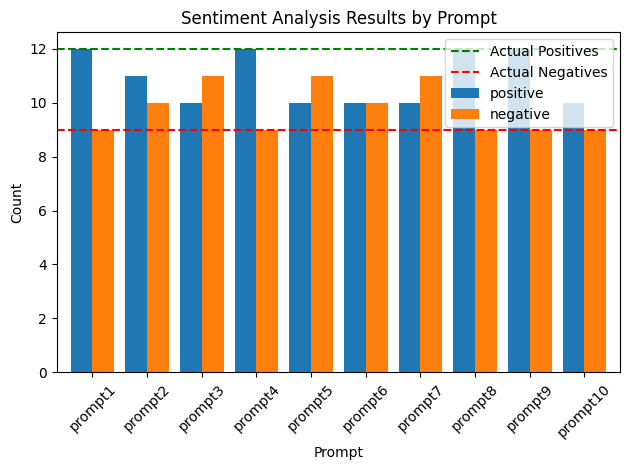

In [19]:
sentiment_counts[['positive', 'negative']].plot(kind='bar', width=0.8)
plt.title("Sentiment Analysis Results by Prompt")
plt.xlabel("Prompt")
plt.ylabel("Count")
plt.xticks(rotation=45)

plt.axhline(y=sentiment_counts['actual_positive'][0], color='green', linestyle='--', label='Actual Positives')
plt.axhline(y=sentiment_counts['actual_negative'][0], color='red', linestyle='--', label='Actual Negatives')

plt.legend()
plt.tight_layout()

plt.show()


In [20]:
#Find mismatches
mismatch_counts = {}

for i in range(1, 11): 
    column_name = f"prompt{i}"
    
    mismatches = df_small.apply(lambda row: row[column_name] != row['sentiment'], axis=1).sum()
    
    mismatch_counts[column_name] = mismatches

max_mismatches_prompt = max(mismatch_counts, key=mismatch_counts.get)
max_mismatches_count = mismatch_counts[max_mismatches_prompt]

print(f"The prompt with the most mismatches is {max_mismatches_prompt} with {max_mismatches_count} mismatches.")


The prompt with the most mismatches is prompt3 with 2 mismatches.


In [ ]:
pip install -U scikit-learn

In [24]:
print("Unique values in 'sentiment' column:", df_small['sentiment'].unique())

for i in range(1, 11):
    column_name = f"prompt{i}"
    print(f"Unique values in '{column_name}' column:", df_small[column_name].unique())


Unique values in 'sentiment' column: ['positive' 'negative']
Unique values in 'prompt1' column: ['positive' 'negative']
Unique values in 'prompt2' column: ['positive' 'negative']
Unique values in 'prompt3' column: ['positive' 'negative']
Unique values in 'prompt4' column: ['positive' 'negative']
Unique values in 'prompt5' column: ['positive' 'negative']
Unique values in 'prompt6' column: ['positive' 'negative' 'not']
Unique values in 'prompt7' column: ['positive' 'negative']
Unique values in 'prompt8' column: ['positive' 'negative']
Unique values in 'prompt9' column: ['positive' 'negative']
Unique values in 'prompt10' column: ['positive' 'negative' 'mixed' 'neutral']


In [25]:
from sklearn.metrics import f1_score
import pandas as pd

f1_scores = {}
for i in range(1, 11):
    column_name = f"prompt{i}"
    # Creating a temporary DataFrame copy where non-binary values are set to None
    temp_df = df_small.copy()
    temp_df['sentiment'] = temp_df['sentiment'].apply(lambda x: x if x in ['positive', 'negative'] else None)
    temp_df[column_name] = temp_df[column_name].apply(lambda x: x if x in ['positive', 'negative'] else None)
    
    # Filtering out rows where either the actual sentiment or the predicted sentiment is None
    temp_df = temp_df.dropna(subset=['sentiment', column_name])
    
    score = f1_score(temp_df['sentiment'], temp_df[column_name], pos_label='positive', average='binary')
    f1_scores[column_name] = score


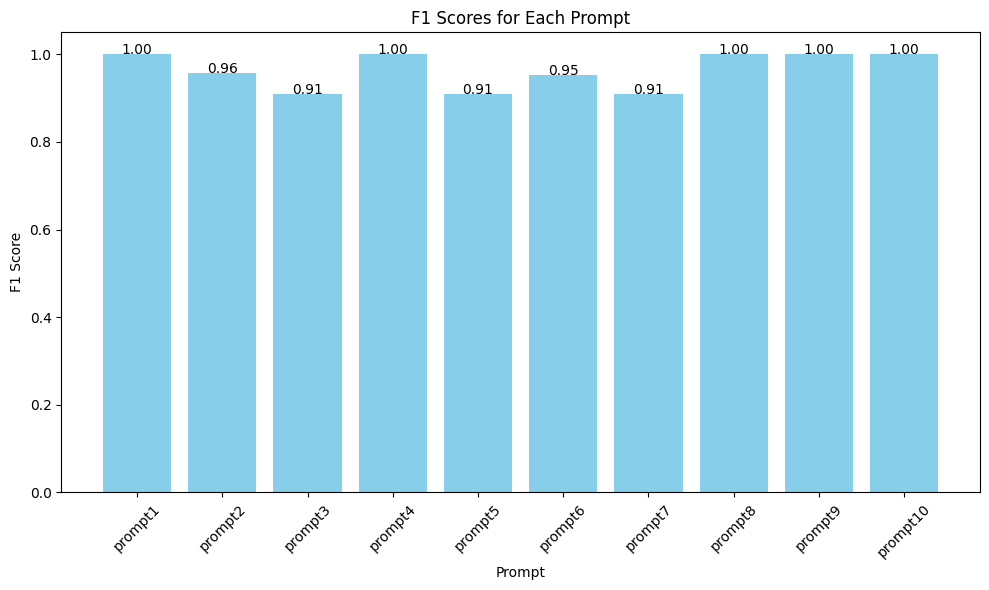

In [26]:
import matplotlib.pyplot as plt

prompt_names = list(f1_scores.keys())

scores = list(f1_scores.values())

plt.figure(figsize=(10, 6))
plt.bar(prompt_names, scores, color='skyblue')

plt.xlabel('Prompt')
plt.ylabel('F1 Score')
plt.title('F1 Scores for Each Prompt')
plt.xticks(rotation=45)  

for i, score in enumerate(scores):
    plt.text(i, score, f"{score:.2f}", ha='center')

plt.tight_layout()
plt.show()


In [27]:
from sklearn.metrics import f1_score

def find_best_prompt_based_on_f1(df, actual_sentiment_col, prompt_cols):
    f1_scores = {}

    
    for col in prompt_cols:
        
        temp_df = df[(df[actual_sentiment_col].isin(['positive', 'negative'])) & (df[col].isin(['positive', 'negative']))]
        
        score = f1_score(temp_df[actual_sentiment_col], temp_df[col], pos_label='positive', average='binary')
        f1_scores[col] = score

    max_f1 = max(f1_scores.values())
    
    best_prompts = [prompt for prompt, score in f1_scores.items() if score == max_f1]

    if len(best_prompts) == 1:
        print(f"The best prompt based on F1 score is {best_prompts[0]} with an F1 score of {max_f1:.4f}.")
    else:
        print(f"The best prompts based on F1 score are {', '.join(best_prompts)} with an F1 score of {max_f1:.4f}.")


prompt_cols = [f"prompt{i}" for i in range(1, 11)]  
find_best_prompt_based_on_f1(df_small, 'sentiment', prompt_cols)


The best prompts based on F1 score are prompt1, prompt4, prompt8, prompt9, prompt10 with an F1 score of 1.0000.
